In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
df=sns.load_dataset('titanic')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
median_age = df['age'].median()
df['age'].fillna(median_age, inplace=True)


<ipython-input-8-3f1bb887d0f0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(median_age, inplace=True)


In [9]:
df.dropna(subset=['embarked'], inplace=True)

In [10]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [11]:
df.drop('deck', axis=1, inplace=True)
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [12]:
overall_survival_rate = df['survived'].mean()
print("Overall Survival Rate:", overall_survival_rate)

Overall Survival Rate: 0.38245219347581555


In [18]:
survived_by_sex = df.groupby('sex')['survived'].mean()
print("survived_by_sex:", survived_by_sex)

survived_by_sex: sex
female    0.740385
male      0.188908
Name: survived, dtype: float64


In [14]:
survival_by_class = df.groupby('pclass')['survived'].mean()
print(survival_by_class)

pclass
1    0.626168
2    0.472826
3    0.242363
Name: survived, dtype: float64


In [16]:
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child','Teen','YoungAdult','Adult','Senior']
# Change 'Age' to 'age' to match the actual column name
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels)

survival_by_agegrp = df.groupby('AgeGroup')['survived'].mean() # Also change 'Survived' to 'survived'
print(survival_by_agegrp)

AgeGroup
Child         0.579710
Teen          0.428571
YoungAdult    0.353271
Adult         0.396907
Senior        0.190476
Name: survived, dtype: float64


<ipython-input-16-904c189b210f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_agegrp = df.groupby('AgeGroup')['survived'].mean() # Also change 'Survived' to 'survived'


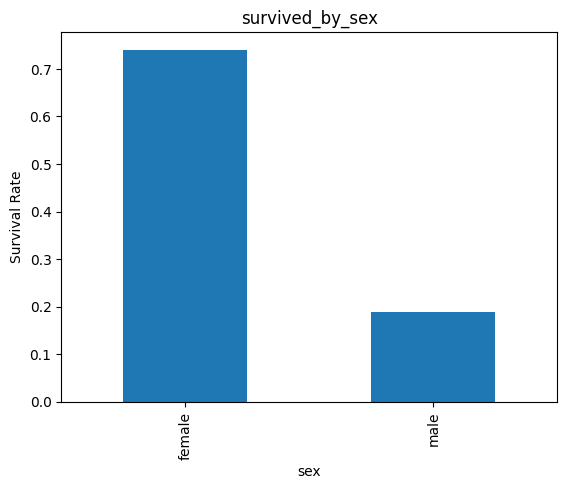

In [23]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib and alias it as 'plt'

survived_by_sex.plot.bar()
plt.title("survived_by_sex")
plt.ylabel("Survival Rate")
plt.show()

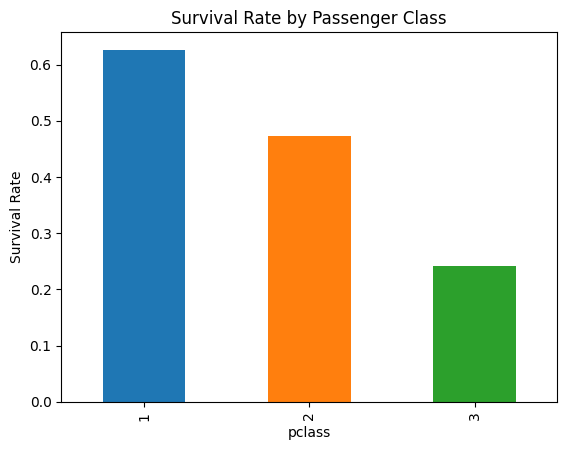

In [24]:
survival_by_class.plot.bar(color=['#1f77b4','#ff7f0e','#2ca02c'])
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

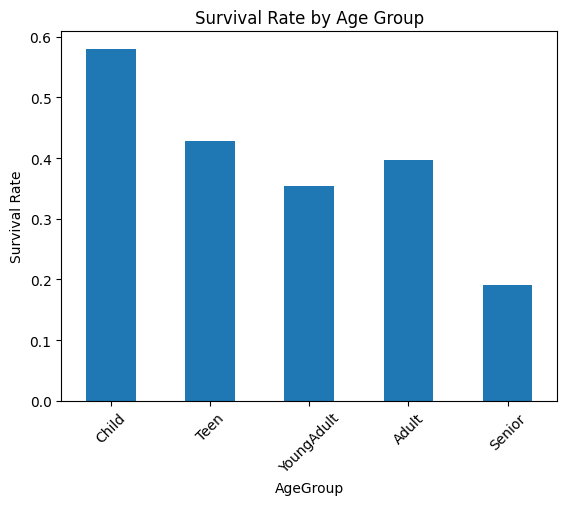

In [25]:
survival_by_agegrp.plot.bar()
plt.title("Survival Rate by Age Group")
plt.ylabel("Survival Rate")
plt.xticks(rotation=45)
plt.show()

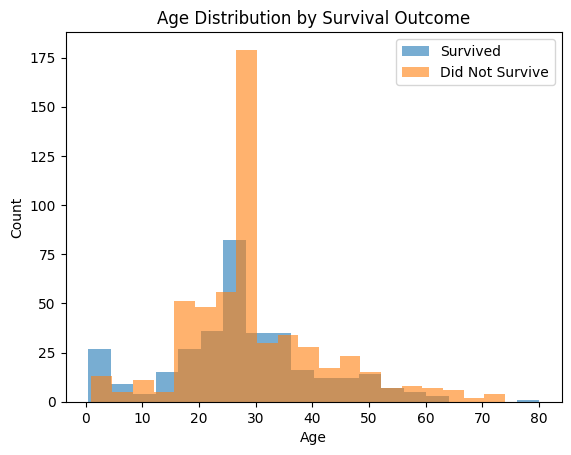

In [27]:
 plt.hist(df[df['survived']==1]['age'], bins=20, alpha=0.6, label='Survived') # Change 'Survived' to 'survived' and 'Age' to 'age'
plt.hist(df[df['survived']==0]['age'], bins=20, alpha=0.6, label='Did Not Survive') # Change 'Survived' to 'survived' and 'Age' to 'age'
plt.legend()
plt.title("Age Distribution by Survival Outcome")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [ ]:
### Key Findings
1. **Women survived at a much higher rate** (~74%) than men (~19%).
2. **First-class passengers** had ~63% survival vs. ~24% in third-class.
3. **Children (0–12)** had slightly better survival than teens/adults, but in low numbers.
4. Younger adults and seniors fared worse—likely tied to “women and children first” policy.